In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [40]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFE
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [6]:
df_raw = pd.read_csv('../Data/financial_distress.csv')
df_raw.head(5)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


Dimentionality Reduction

In [28]:
xvar_df = df_raw.iloc[:, 3:]
yvar_df = df_raw.iloc[:, 2]

<BarContainer object of 83 artists>

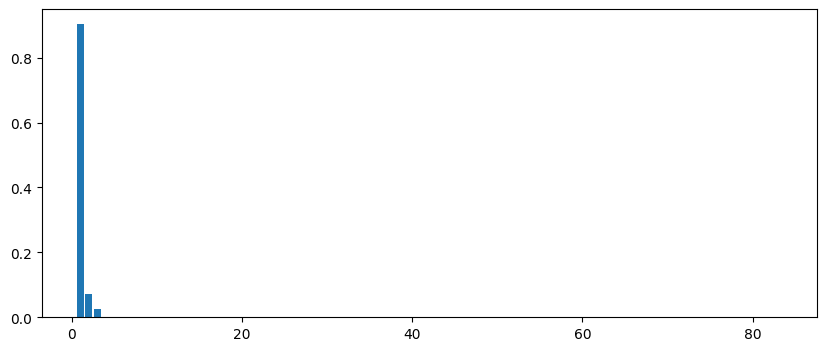

In [9]:
pca_model = PCA().fit(xvar_df)
x = [i for i in range(1, 84)]
y = pca_model.explained_variance_ratio_
plt.figure(figsize=(10, 4))
plt.bar(x=x, height=y)

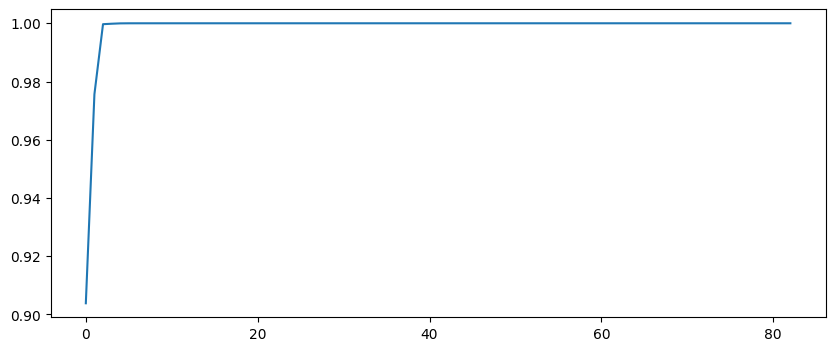

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(y))

Using the plot we will choose 3 principal components

In [42]:
pca3_model = PCA(n_components=3).fit_transform(xvar_df)
pca3_model

array([[ -365901.58941966,   -68780.09478177,  -100179.73997737],
       [ -365900.51722507,   -68761.52195328,  -100182.0144302 ],
       [ -365900.61190246,   -68712.76834112,  -100180.89781289],
       ...,
       [ 1046417.544615  ,  -101706.80730814, 20150611.9384404 ],
       [ -365872.61615349,   -68597.59111939,   -99940.99044681],
       [ -365885.63734055,   -68006.75963159,  -100058.09163586]])

Feature subset selection

Variance Threshold method to eliminate low variance feature. We select a threshold of 0.1.

In [20]:
selector = VarianceThreshold(0.1).fit(xvar_df)
selected_vars = selector.get_feature_names_out()
len(xvar_df.columns) - len(selected_vars)

Feature selection using the Lasso model

In [37]:
lasso_05 = Lasso(alpha=0.5).fit(xvar_df, yvar_df)
sfm_selector_05 = SelectFromModel(lasso_05).fit(xvar_df, yvar_df)
sfm_selector_05.get_feature_names_out()

array(['x16', 'x22', 'x25', 'x41', 'x42', 'x48', 'x63', 'x64', 'x65',
       'x68', 'x69', 'x71', 'x80', 'x82'], dtype=object)

In [38]:
lasso_1 = Lasso(alpha=1.0).fit(xvar_df, yvar_df)
sfm_selector_1 = SelectFromModel(lasso_1).fit(xvar_df, yvar_df)
sfm_selector_1.get_feature_names_out()

array(['x16', 'x22', 'x25', 'x48', 'x63', 'x64', 'x69', 'x71'],
      dtype=object)

Feature selection using RFE

In [41]:
rfe_selector = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=8)
rfe_selector.fit(xvar_df, yvar_df)
rfe_selector.get_feature_names_out()

array(['x9', 'x25', 'x28', 'x36', 'x48', 'x53', 'x66', 'x81'],
      dtype=object)